<a href="https://colab.research.google.com/github/VijitSai/Genetic-Algorithms/blob/main/Fitness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# low = lower range for variables, high = higher range for variables
import math
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [ ]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2*x*z*math.exp(-x)-2*y**3+y**2-3*z**3 
   return fitness

In [ ]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [ ]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [ ]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [ ]:
import numpy as np
from random import randint

num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[ 63.24382126 -82.74495381 -93.80437403]
 [ 33.34453228  49.94933453 -18.47263663]
 [ 94.44395008  41.95197232 -65.99249145]
 [ 28.1311401   64.72615036  85.28904713]
 [ 88.56884802 -19.89287814  40.80910244]
 [ -2.62338971  67.30172673 -72.42869769]
 [ 22.10550764  74.7390605  -71.83736302]
 [-87.21342367 -18.7335772   46.5878205 ]
 [-35.91017115  74.60309021  80.53156892]
 [ 86.99770415 -12.56531137 -55.80335256]
 [-14.21698164  32.22246474  24.22971459]
 [ 90.67778879 -92.33991389 -68.18254523]
 [  2.97840325 -16.76368035 -70.46558148]
 [ 41.60692139  97.61463476  38.10603689]
 [ 48.40359244 -74.74956277 -50.14367528]
 [ 79.45071199 -75.26487592 -78.06182595]
 [-87.3022128    9.8819683  -67.06252644]
 [-89.65055394  95.26622441  97.56473629]
 [ 40.00166087 -12.30307494  10.9718356 ]
 [-38.39067344 -46.49052074 -90.60240819]
 [ 34.13625446  70.83006818 -13.4236097 ]
 [ 53.83237997  68.76686451  22.906649  ]
 [ 58.72957373 -15.01984197  -2.89375555]
 [-60.36516698  10.93473689  84.52

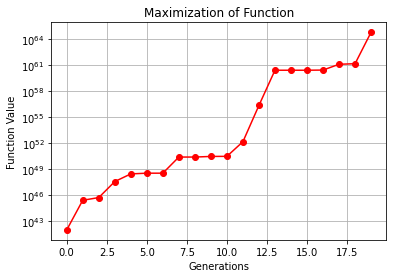

In [ ]:
import matplotlib.pyplot as plt
import math
Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()